# OSMnx Examples by Julia Amaral
#### Documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html
#### More examples: https://github.com/gboeing/osmnx-examples/tree/main/notebooks
#### Google Scholar of the guy that created it: https://scholar.google.com/citations?user=xaKBPQQAAAAJ&hl=en
#### His webpage: https://geoffboeing.com

## Import Graphs

/Users/julia/miniconda3/envs/ox/lib/python3.7/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


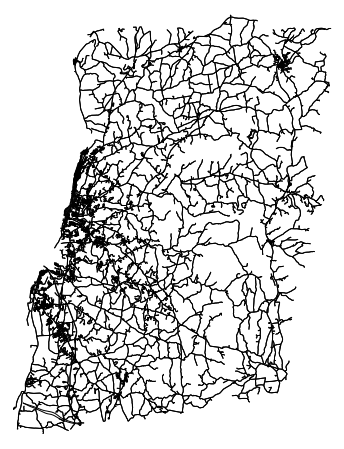

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
import osmnx as ox

#import network from place 
G = ox.graph_from_place('Rensselar County, New York, United States', network_type='drive', simplify=True)

#save network as shapefile
ox.save_graph_shapefile(G, filepath='/Users/julia/Dropbox/Python Examples/Rensselaer', encoding='utf-8', directed=False)

#create a figure
ox.plot_graph(G, dpi=100, edge_linewidth=1, edge_color='black', bgcolor='white', node_size=0, save=True,\
             filepath='/Users/julia/Dropbox/Python Examples/Rensselaer.png')

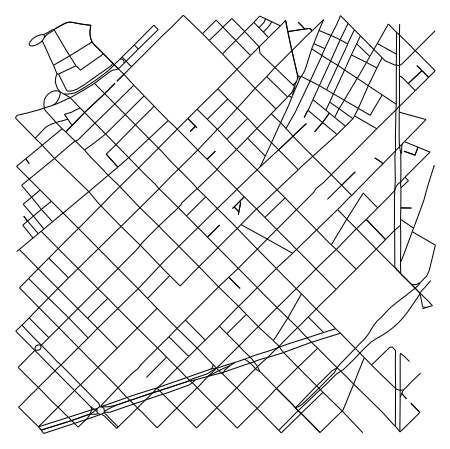

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
#import network from point as bbox
G = ox.graph_from_point((41.407071, 2.177062), dist=1000, dist_type='bbox', network_type='drive', simplify=True)

#create a figure
ox.plot_graph(G, dpi=100, edge_linewidth=1, edge_color='black', bgcolor='white', node_size=0, save=True,\
             filepath='/Users/julia/Dropbox/Python Examples/Barcelona.png')

## Shortest Path Between 2 Points

distance=1615.718


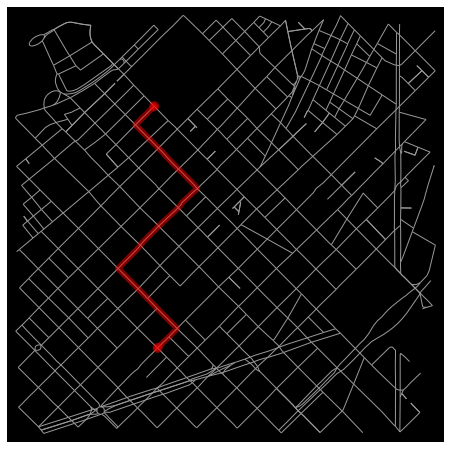

In [ ]:
import networkx as nx

origin = [41.411748, 2.172696]
destination = [41.402104, 2.173180]

#get the nearest node of the network
origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0]) #Graph, LONGITUDE, LATITUDE
destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])   

#shortest path
route = nx.shortest_path(G, source=origin_node, target=destination_node, weight='length')

#Compute travel distance in the network 
dist = sum(ox.utils_graph.get_route_edge_attributes(G, route, attribute='length',minimize_key='length'))
print('distance='+str(dist))

fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

## Get Network Attributes

In [ ]:
#Get basic statics of the network
ox.stats.basic_stats(G)

{'n': 523,
 'm': 905,
 'k_avg': 3.4608030592734225,
 'edge_length_total': 76116.06000000004,
 'edge_length_avg': 84.10614364640888,
 'streets_per_node_avg': 3.424474187380497,
 'streets_per_node_counts': {0: 0,
  1: 26,
  2: 2,
  3: 235,
  4: 247,
  5: 11,
  6: 1,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0497131931166348,
  2: 0.0038240917782026767,
  3: 0.44933078393881454,
  4: 0.4722753346080306,
  5: 0.021032504780114723,
  6: 0.0019120458891013384,
  7: 0.0019120458891013384},
 'intersection_count': 497,
 'street_length_total': 72143.504,
 'street_segment_count': 843,
 'street_length_avg': 85.57948279952551,
 'circuity_avg': 1.0108162298697059,
 'self_loop_proportion': 0.0}

In [ ]:
#get information of the edges in a route
ox.utils_graph.get_route_edge_attributes(G, route, minimize_key='length')

[{'osmid': 175473474,
  'oneway': True,
  'name': 'Carrer de Rosalía de Castro',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 125.78600000000002,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f84374dd490>},
 {'osmid': 263405142,
  'oneway': True,
  'lanes': '2',
  'name': 'Carrer de los Castillejos',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 91.81,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f8436937350>},
 {'osmid': 263405142,
  'oneway': True,
  'lanes': '2',
  'name': 'Carrer de los Castillejos',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 64.119,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f8437e89990>},
 {'osmid': 263405142,
  'oneway': True,
  'lanes': '2',
  'name': 'Carrer de los Castillejos',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 137.96699999999998,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f84354a6210>},
 {'osmid': 263405142,
  'oneway': True,

In [ ]:
#the same funcion can be used to get the attributes of an specific edge that connects node u to node v
u=30254052
v=30254051
ox.utils_graph.get_route_edge_attributes(G, [u,v], minimize_key='length')

[{'osmid': 237519390,
  'oneway': True,
  'lanes': '3',
  'name': 'Carrer de Padilla',
  'highway': 'secondary',
  'maxspeed': '50',
  'length': 86.536,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f842de69910>}]

total length of primary streets is 6936.180000000002


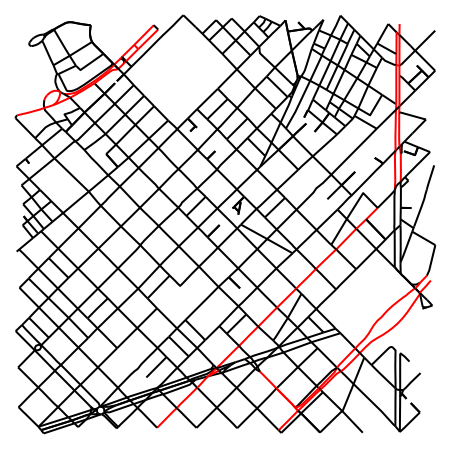

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
#it is possible to iterate over all the edges to get an specific information
#For example: get the total length of primary streets and show them in a figure

length_primary = 0
colors = []

for u,v,data in G.edges(data=True):
    if data['highway']=='primary':
        length_primary = length_primary + data['length']
        colors.append('red')
    else:
        colors.append('black')

print('total length of primary streets is '+str(length_primary))

#create a figure
ox.plot_graph(G, dpi=100, edge_linewidth=2, edge_color=colors, bgcolor='white', node_size=0, save=True,\
             filepath='/Users/julia/Dropbox/Python Examples/Barcelona2.png')

In [ ]:
#convert nodes information to a data frame
df_nodes = ox.graph_to_gdfs(G, edges=False)
df_nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30242768,41.398187,2.184898,3,NaN,NaN,POINT (2.18490 41.39819)
30242872,41.398394,2.175416,4,NaN,NaN,POINT (2.17542 41.39839)
30242874,41.400114,2.177707,4,NaN,NaN,POINT (2.17771 41.40011)
30242877,41.401402,2.179461,4,NaN,NaN,POINT (2.17946 41.40140)
30242952,41.409585,2.165143,4,traffic_signals,NaN,POINT (2.16514 41.40958)
...,...,...,...,...,...,...
8338986129,41.398979,2.169342,5,NaN,NaN,POINT (2.16934 41.39898)
8439080657,41.407088,2.177942,3,NaN,NaN,POINT (2.17794 41.40709)
8617734012,41.413145,2.170761,1,NaN,NaN,POINT (2.17076 41.41315)


In [ ]:
#convert edges information to a data frame
df_edges = ox.graph_to_gdfs(G, nodes=False)
df_edges

osmid  oneway lanes  \
u          v          key                                         
30242872   30254198   0                 450613277    True     2   
30242874   30242965   0                 313379192    True     2   
           3193317990 0                 450613277    True     2   
30242877   442540279  0                 313379196    True     2   
           4436976529 0                 446419827    True     3   
...                                           ...     ...   ...   
8439080657 30555975   0                 269871711    True     1   
8617734012 30254014   0                 555296657   False   NaN   
8617734013 1860569745 0                 929228609   False   NaN   
8637567268 243756418  0                 931878852    True     4   
           431481321  0    [308354705, 931878851]    True     3   

                                                      name      highway  \
u          v          key                                                 
30242872   30254198   0         Carrer del Consell de Cent  residential   
30242874   30242965   0                 Carrer de Sardenya     tertiary   
           3193317990 0         Carrer del Consell de Cent  residential   
30242877   442540279  0                  Avinguda Diagonal     tertiary   
           4436976529 0         Carrer del Consell de Cent     tertiary   
...                                                    ...          ...   
8439080657 30555975   0                 Carrer de Provença  residential   
8617734012 30254014   0           Carrer del Mas Casanovas  residential   
8617734013 1860569745 0           Carrer del Mas Casanovas  residential   
8637567268 243756418  0                   Carrer de Lepant    secondary   
           431481321  0    Gran Via de les Corts Catalanes      primary   

                          maxspeed width   length  \
u          v          key                           
30242872   30254198   0         30     6  136.453   
30242874   30242965   0         50   NaN  138.198   
           3193317990 0         30     6  127.138   
30242877   442540279  0         50   NaN   80.396   
           4436976529 0         30     6   66.466   
...                            ...   ...      ...   
8439080657 30555975   0         30     3   24.938   
8617734012 30254014   0         30   NaN   70.164   
8617734013 1860569745 0         30   NaN   46.728   
8637567268 243756418  0         50   NaN    9.952   
           431481321  0         50   NaN  147.758   

                                                                    geometry  \
u          v          key                                                      
30242872   30254198   0    LINESTRING (2.17542 41.39839, 2.17559 41.39852...   
30242874   30242965   0    LINESTRING (2.17771 41.40011, 2.17776 41.40007...   
           3193317990 0    LINESTRING (2.17771 41.40011, 2.17775 41.40014...   
30242877   442540279  0    LINESTRING (2.17946 41.40140, 2.18028 41.40159...   
           4436976529 0    LINESTRING (2.17946 41.40140, 2.17971 41.40159...   
...                                                                      ...   
8439080657 30555975   0    LINESTRING (2.17794 41.40709, 2.17779 41.40697...   
8617734012 30254014   0    LINESTRING (2.17076 41.41315, 2.17074 41.41313...   
8617734013 1860569745 0    LINESTRING (2.17087 41.41323, 2.17110 41.41340...   
8637567268 243756418  0      LINESTRING (2.18239 41.40009, 2.18248 41.40003)   
           431481321  0    LINESTRING (2.18239 41.40009, 2.18217 41.39993...   

                          access bridge junction   ref  
u          v          key                               
30242872   30254198   0      NaN    NaN      NaN   NaN  
30242874   30242965   0      NaN    NaN      NaN   NaN  
           3193317990 0      NaN    NaN      NaN   NaN  
30242877   442540279  0      NaN    NaN      NaN   NaN  
           4436976529 0      NaN    NaN      NaN   NaN  
...                          ...    ...      ...   ...  
843908065